In [4]:
#This is the python code that uses Movies IMDB database as input. This input doesnt require any Data Cleaning phase as its already 
#done. With this input I am trying to answer below listed questions using Python packages like Numpy, Pandas and visualization
#packages like matplotlib, seaborn. 

In [348]:
#Questions are to be explored and answered : 
#    1. How have movie genres changed over time ?
#    2. How do top few directors have performed over a period ? 

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
df = pd.read_csv("tmdb-movies.csv")
#print(df.head(10))

In [351]:
df2 = df['genres'].str.split('|', expand = True)

df2.columns = ['genre1','genre2','genre3','genre4','genre5']

df = pd.concat([df,df2], axis = 1)

df = df.drop(['genre4','genre5','genres'],axis=1)

#print(df)

In [352]:
df3 = pd.melt(df,id_vars = ['id','imdb_id','popularity','budget','revenue',
                          'original_title','cast','homepage','director','tagline',
                           'keywords','overview','runtime','production_companies',
                           'release_date','vote_count','vote_average','release_year',
                           'budget_adj','revenue_adj'] , value_vars = ['genre1','genre2','genre3'])


df3 = df3.drop(['variable','imdb_id','original_title','homepage','tagline','keywords','overview'], axis = 1)

df3 = df3.rename(columns = {'value':'genre'})


In [353]:
print(df3[df3['id']==135397])

           id  popularity     budget     revenue  \
0      135397   32.985763  150000000  1513528810   
10866  135397   32.985763  150000000  1513528810   
21732  135397   32.985763  150000000  1513528810   

                                                    cast         director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
10866  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
21732  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

       runtime                               production_companies  \
0          124  Universal Studios|Amblin Entertainment|Legenda...   
10866      124  Universal Studios|Amblin Entertainment|Legenda...   
21732      124  Universal Studios|Amblin Entertainment|Legenda...   

      release_date  vote_count  vote_average  release_year    budget_adj  \
0           6/9/15        5562           6.5          2015  1.379999e+08   
10866       6/9/15        5562           6.5         

In [354]:
print(df3.describe())

                  id    popularity        budget       revenue       runtime  \
count   32598.000000  32598.000000  3.259800e+04  3.259800e+04  32598.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92127.310180      1.000154  3.091227e+07  1.169999e+08     31.380442   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  32598.000000  32598.000000  32598.000000  3.259800e+04  3.259800e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.601399      0.935113     12.8125

In [355]:
#Plot a chart that shows how genres have moved over a period of time.

#Lets first find the most popular genres over a period of 1960s to 2010. 
#In the list of genres, we will take first 3 most popular and then plot a chart of how those three genres are performing for
# the given period of time. 

In [356]:
genre_count = df3.groupby(['genre'])['genre'].count()

genre_count = genre_count.sort_values(ascending = False)

genre_count = pd.DataFrame(genre_count)

genre_count.columns = ['count']

genre_count = genre_count.reset_index()

print(genre_count)

              genre  count
0             Drama   4618
1            Comedy   3697
2          Thriller   2338
3            Action   2333
4            Horror   1590
5           Romance   1473
6         Adventure   1395
7             Crime   1180
8            Family    993
9   Science Fiction    945
10          Fantasy    766
11        Animation    690
12          Mystery    652
13      Documentary    517
14            Music    362
15          History    291
16              War    207
17          Foreign    140
18         TV Movie    126
19          Western    124


In [357]:
genre_by_revenue = df3.groupby(['genre'])['revenue_adj'].sum()

genre_by_revenue = genre_by_revenue.sort_values(ascending = False)

genre_by_revenue = pd.DataFrame(genre_by_revenue)

genre_by_revenue.columns = ['Revenue']

genre_by_revenue = genre_by_revenue.reset_index()

print(genre_by_revenue)

              genre       Revenue
0            Action  2.127442e+11
1         Adventure  1.965180e+11
2             Drama  1.860797e+11
3            Comedy  1.684133e+11
4          Thriller  1.219093e+11
5           Fantasy  8.273073e+10
6            Family  8.100944e+10
7   Science Fiction  7.713714e+10
8           Romance  6.671297e+10
9             Crime  6.457865e+10
10        Animation  5.721639e+10
11           Horror  3.756836e+10
12          Mystery  3.011699e+10
13            Music  1.494474e+10
14          History  1.437367e+10
15              War  1.354096e+10
16          Western  5.895258e+09
17      Documentary  1.174269e+09
18          Foreign  2.449829e+08
19         TV Movie  5.838910e+07


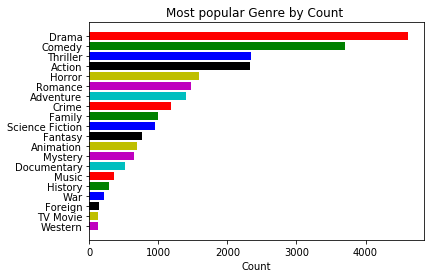

In [358]:
fig, ax = plt.subplots()

y_pos = np.arange(len(genre_count['genre']))

ax.barh(y_pos, genre_count['count'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_count['genre'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most popular Genre by Count ')
plt.show()

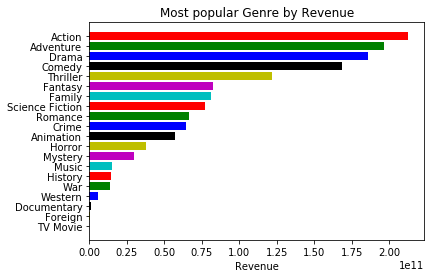

In [359]:
fig, ax = plt.subplots()

y_pos = np.arange(len(genre_by_revenue['genre']))

ax.barh(y_pos, genre_by_revenue['Revenue'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_by_revenue['genre'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Most popular Genre by Revenue')
plt.show()

In [360]:
#For my analysis purpose, lets take Action, Drama and Comedy  from the top list. 
#The reason why i have chosen these three genre is, based on number of movie count as well as revenue generated Drama and Comedy 
#took first 4 places. Thats general liking of the public. 
#Though adventure is in the top revenue generated, number of movies is very low. That way Action Genre has better balance between 
#Revenue generation as well as Movie Count. 
#Going forward all my analysis will be on these three genre to answer my first question. 

In [361]:
#Lets get the data ready to plot the three genres based on the count over the period of time. 

In [362]:
df4 = df3[(df3['genre'] == 'Action') | (df3['genre'] == 'Comedy') | (df3['genre'] == 'Drama')]

df4_genre_count = df4.groupby(['genre','release_year'])['genre'].count()

df4_genre_count = pd.DataFrame(df4_genre_count)

df4_genre_count.columns = ['count']

df4_genre_count = df4_genre_count.reset_index()

df4_Action = df4_genre_count[df4_genre_count['genre'] == 'Action']

df4_Drama = df4_genre_count[df4_genre_count['genre'] == 'Drama']

df4_Comedy = df4_genre_count[df4_genre_count['genre'] == 'Comedy']



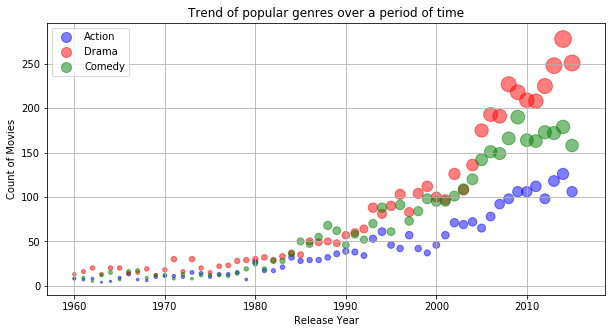

In [363]:
fig, ax = plt.subplots(figsize=(10,5))

x = df4_Action['release_year']

y = df4_Action['count']

plt.scatter(x, y, s = df4_Action['count'] , c = 'b', label = 'Action', alpha=0.5)

x = df4_Drama['release_year']

y = df4_Drama['count']

plt.scatter(x, y, s = df4_Drama['count'] , c = 'r', label = 'Drama', alpha=0.5)

x = df4_Comedy['release_year']
y = df4_Comedy['count']


plt.scatter(x, y, s = df4_Comedy['count'] , c = 'g', label = 'Comedy', alpha=0.5)

ax.legend()

ax.grid(True)

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [100]

lgnd.legendHandles[1]._sizes = [100]

lgnd.legendHandles[2]._sizes = [100]

plt.xlabel("Release Year")

plt.ylabel("Count of Movies")

plt.title("Trend of popular genres over a period of time")

plt.show()

In [364]:
#Above chart shows three different genres plotted over the period from 1960 to 2010. Three colours are showing three genres. 
#Scatter plot has been made to show how count increased as the year passed. Chart is made in such a way that size of bubble gets 
#increased or decreased depends on the value of the count. 

#Its clear evident from the chart that over the period, more movies came up based on these three genres. It increased steadily
# from 1960 to 2010.

In [365]:
df5_genre_revenue = df4.groupby(['genre','release_year'])['revenue_adj'].sum()

df5_genre_revenue = pd.DataFrame(df5_genre_revenue)

df5_genre_revenue.columns = ['Revenue']

df5_genre_revenue = df5_genre_revenue.reset_index()

df5_Action =  df5_genre_revenue[df5_genre_revenue['genre'] == 'Action']

df5_Drama =   df5_genre_revenue[df5_genre_revenue['genre'] == 'Drama']

df5_Comedy = df5_genre_revenue[df5_genre_revenue['genre'] == 'Comedy']


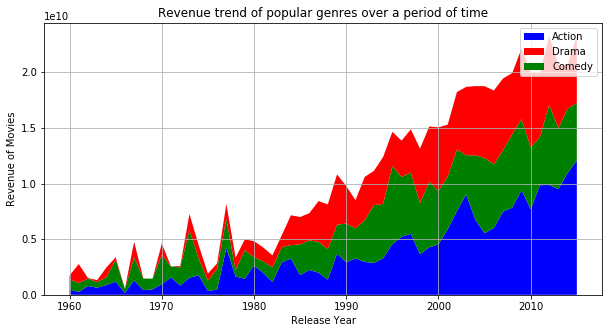

In [366]:
fig, ax = plt.subplots(figsize=(10,5))

x = df5_Action['release_year']

y = df5_Action['Revenue']

x1 = df5_Drama['release_year']

y1 = df5_Drama['Revenue']

x2 = df5_Comedy['release_year']

y2 = df5_Comedy['Revenue']


plt.stackplot(x, y, x1, y1, x2, y2, labels = ["Action","Drama","Comedy"], colors = ['blue','r','green'])

ax.grid(True)

ax.legend()

plt.xlabel("Release Year")

plt.ylabel("Revenue of Movies")

plt.title("Revenue trend of popular genres over a period of time")

plt.show()

In [367]:
# We can see the same evidence in Revenue also like Count showed above. 

# Revenue returned has been increased a lot from 1960 to 2010 for all the three genres. 
    

In [368]:
# These charts have shown that these three genres have gained lot more attention year on year among the public 
#over a period of 1960 to 2010. 

In [ ]:
# Lets plot charts to find the top 10 directors in Revenue generation and how they are popular among public.

# For this, lets first prepare the data to pull out Revenue of all the directors and then plot the top 10 directors who 
# generated highest Revenue.

# Pick those Top 10 directors and find out the public vote they could earn and find who is best among those top 10.

In [369]:
df6 = df3[['director','vote_count','revenue_adj']]

df6 = df6.groupby(['director'])['revenue_adj'].sum()

df6 = df6.sort_values(ascending = False)

df6 = pd.DataFrame(df6)

df6.columns = ['revenue']

df6 = df6.reset_index()

df7 = df3[['director','vote_count','revenue_adj']]

df7 = df7.groupby(['director'])['vote_count'].sum()

df7 = df7.sort_values(ascending = False)

df7 = pd.DataFrame(df7)

df7.columns = ['vote_count']

df7 = df7.reset_index()


In [373]:
print(df7.describe())

          vote_count
count    5067.000000
mean     1398.093546
std      5333.706403
min        30.000000
25%        51.000000
50%       135.000000
75%       567.000000
max    125277.000000


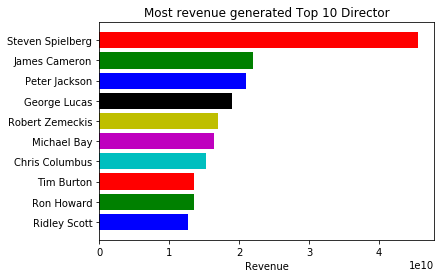

In [370]:
fig, ax = plt.subplots()

df6_Top10 = df6.head(10)

y_pos = np.arange(len(df6_Top10['director']))

ax.barh(y_pos, df6_Top10['revenue'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df6_Top10['director'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Most revenue generated Top 10 Director')
plt.show()

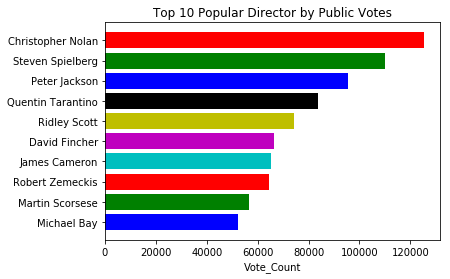

In [371]:
fig, ax = plt.subplots()

df7_Top10 = df7.head(10)

y_pos = np.arange(len(df7_Top10['director']))

ax.barh(y_pos, df7_Top10['vote_count'],  align='center', color = 'rgbkymc' ,ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df7_Top10['director'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Vote_Count')
ax.set_title('Top 10 Popular Director by Public Votes')
plt.show()

In [372]:
# We can clearly see from the above two charts that though Steven Spielberg is the top most revenue generated Director, public 
# Top votes go to Christopher Nolan. Steven is a producer director whereas Christopher is People's Director. 